In [16]:
import os
from paquo.projects import QuPathProject
from paquo.classes import QuPathPathClass
qp = QuPathProject(r'\\babyserverdw5.win.ad.jhu.edu\Digital pathology image lib\HubMap Skin TMC project\230418 HM-SR1-Skin-P009-B1-SB01\qpproj\project.qpproj')

QuPathProject(path="\\babyserverdw5.win.ad.jhu.edu\Digital pathology image lib\HubMap Skin TMC project\230418 HM-SR1-Skin-P009-B1-SB01\qpproj\project.qpproj" mode="r")
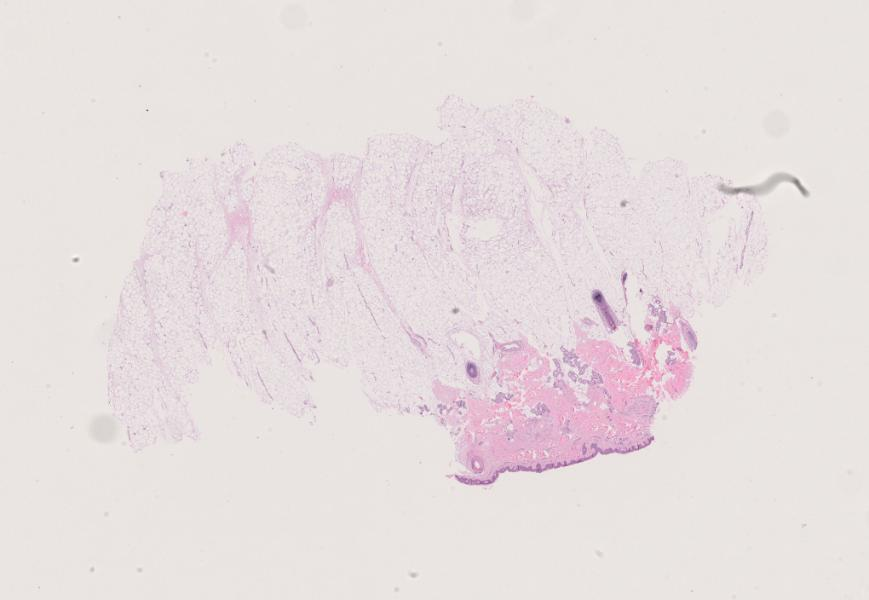
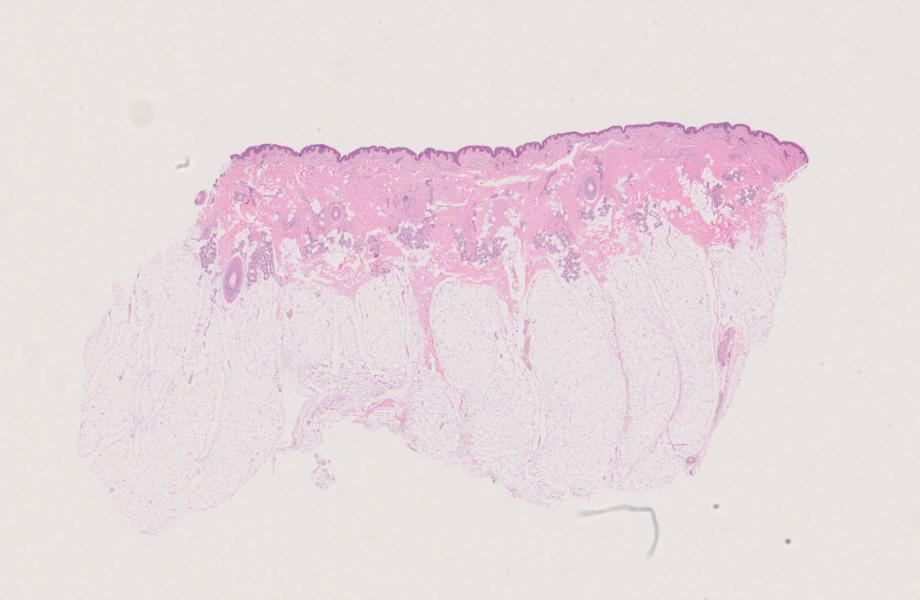
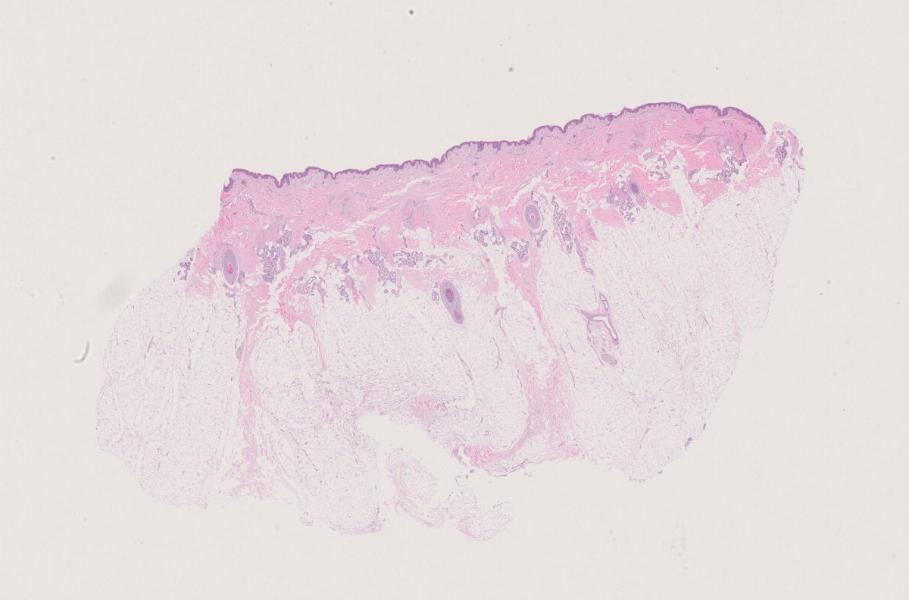
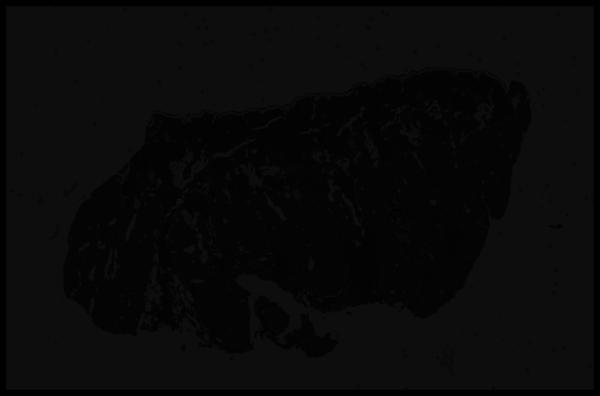
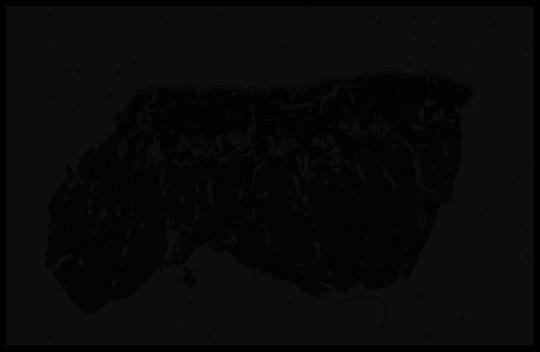
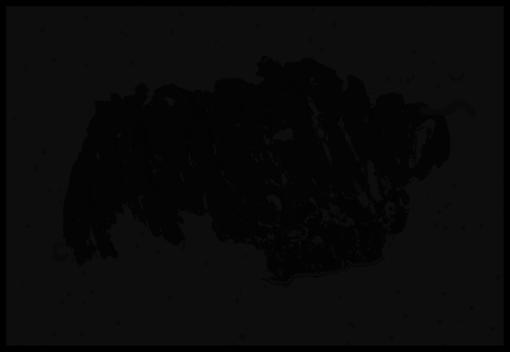

In [2]:
qp

In [3]:
print(f"Opened project ‘{qp.name}’ ")
print(f"Project has {len(qp.images)} image(s).")
 
print(qp.images)

Opened project ‘qpproj’ 
Project has 6 image(s).
ImageEntries(['z-0001_2023-04-18 10.26.59.ndpi', 'z-0100_2023-04-18 13.51.51.ndpi', 'z-0050_2023-04-18 12.07.33.ndpi', 'z-0050_2023-04-18 12.07.33_DLTLprocess05.tif', 'z-0100_2023-04-18 13.51.51_DLTLprocess05.tif', 'z-0001_2023-04-18 10.26.59_DLTLprocess05.tif'])


In [14]:
def add_qupath_classes(MY_CLASSES_AND_COLORS, qpout):
    new_classes = []
    for class_name, class_color in MY_CLASSES_AND_COLORS:
        new_classes.append(
            QuPathPathClass(name=class_name, color=class_color)
        )
    # setting QuPathProject.path_class always replaces all classes
    qpout.path_classes = new_classes

In [17]:
MY_CLASSES_AND_COLORS = [
("cell", "#ff0000"),
("Some Other Class", "#0000ff"),
("Nothing*", "#00ff00"),
]

qpproj_dst = r'\\babyserverdw5.win.ad.jhu.edu\Digital pathology image lib\HubMap Skin TMC project\230418 HM-SR1-Skin-P009-B1-SB01\qpproj2'
if not os.path.exists(qpproj_dst): os.mkdir(qpproj_dst)
NEW_PROJECT_PATH = os.path.join(qpproj_dst,'project.qpproj')
with QuPathProject(NEW_PROJECT_PATH, mode='a') as qpout:  
    add_qupath_classes(MY_CLASSES_AND_COLORS, qpout)
    
# confirm output
print("project classes:")
for path_class in qpout.path_classes:
    print(">", f"'{path_class.name}'", path_class.color.to_hex()) v

print(f"done. Please look at {qpout.name} in QuPath.")

project classes:
> 'cell' #ff0000
> 'Some Other Class' #0000ff
> 'Nothing*' #00ff00
done. Please look at qpproj2 in QuPath.


In [4]:
def read_qupath_annotations(image):
    annotations = image.hierarchy.annotations  
    ann = [annotation.roi for annotation in annotations] if annotations else list()
    return ann
  
def read_qupath_detections(image):
    detections = image.hierarchy.detections
    det = [detection.roi for detection in detections] if detections else list()
    return det
 
 
image = qp.images[0]
ann = read_qupath_annotations(image)  # We keep the annotations, but we don't classify them
det = read_qupath_detections(image)
allshapes = det  # We only want to classify the detections

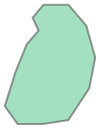

In [8]:
ann[0]